In [1]:
import numpy as np
from PIL import Image
import cv2

def fisheye_distortion(image, distortion_factor):
    # Get image dimensions
    height, width = image.shape[:2]

    # Calculate center coordinates
    center_x = width // 2
    center_y = height // 2

    # Create a blank fisheye image
    distorted_image = np.zeros_like(image)

    # Iterate over each pixel in the distorted image
    for y in range(height):
        for x in range(width):
            # Calculate polar coordinates
            dx = x - center_x
            dy = y - center_y
            radius = np.sqrt(dx**2 + dy**2)
            theta = np.arctan2(dy, dx)

            # Apply fisheye distortion
            distorted_radius = radius**distortion_factor
            distorted_x = int(center_x + distorted_radius * np.cos(theta))
            distorted_y = int(center_y + distorted_radius * np.sin(theta))

            # Check if the distorted pixel is within the original image boundaries
            if 0 <= distorted_x and distorted_x < width and 0 <= distorted_y and distorted_y < height:
                # Assign the color from the original image to the distorted pixel
                distorted_image[distorted_y, distorted_x] = image[y, x]

    return distorted_image


In [7]:
def fisheye_distortion(image, distortion_factor):
    # Get image dimensions
    height, width = image.shape[:2]

    # Define camera intrinsic parameters for fisheye distortion
    K = np.array([[width, 0, width // 2], [0, height, height // 2], [0, 0, 1]], dtype=np.float64)
    D = np.array([0, 0, 0, 0], dtype=np.float64)

    # Generate fisheye distortion map
    map_x, map_y = cv2.fisheye.initUndistortRectifyMap(K, D, np.eye(3), K, (width, height), cv2.CV_16SC2)

    # Remap the image using the fisheye distortion map
    distorted_image = cv2.remap(image, map_x, map_y, interpolation=cv2.INTER_LINEAR)

    return distorted_image


In [3]:
frame = cv2.imread("./test.jpeg")

frame.shape

(533, 800, 3)

In [8]:
distorted_image = fisheye_distortion(frame, 0.6)

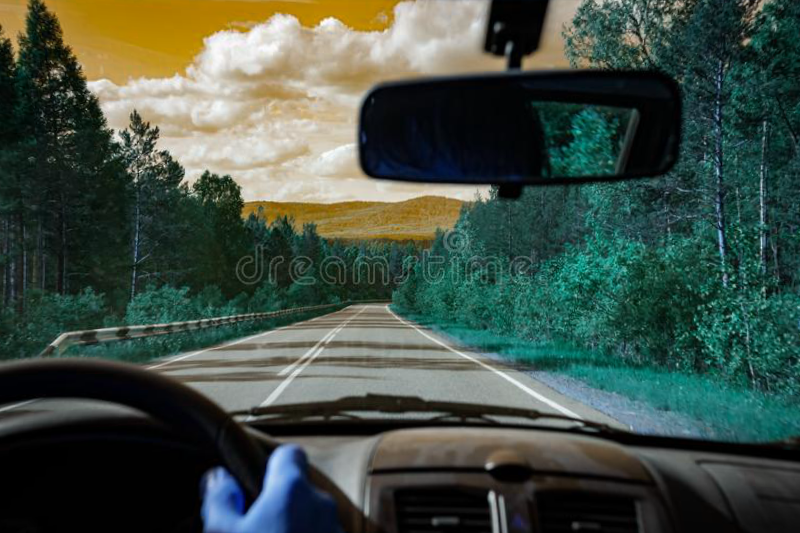

In [9]:
Image.fromarray(distorted_image)

In [10]:

def barrel_distortion(image, distortion_factor):
    # Get image dimensions
    height, width = image.shape[:2]

    # Calculate center coordinates
    center_x = width // 2
    center_y = height // 2

    # Create a blank distorted image
    distorted_image = np.zeros_like(image)

    # Iterate over each pixel in the distorted image
    for y in range(height):
        for x in range(width):
            # Calculate normalized coordinates
            nx = (x - center_x) / center_x
            ny = (y - center_y) / center_y

            # Calculate polar coordinates
            r = np.sqrt(nx**2 + ny**2)
            theta = np.arctan2(ny, nx)

            # Apply barrel distortion
            distorted_r = r * (1 + distortion_factor * r**2)
            distorted_x = int(center_x + distorted_r * np.cos(theta) * center_x)
            distorted_y = int(center_y + distorted_r * np.sin(theta) * center_y)

            # Check if the distorted pixel is within the original image boundaries
            if 0 <= distorted_x < width and 0 <= distorted_y < height:
                # Assign the color from the original image to the distorted pixel
                distorted_image[distorted_y, distorted_x] = image[y, x]

    return distorted_image

# Load the original image
original_image = cv2.imread("./test.jpeg")

# Set the distortion factor (higher values produce stronger distortion)
distortion_factor = 0.3

# Apply barrel distortion
distorted_image = barrel_distortion(original_image, distortion_factor)

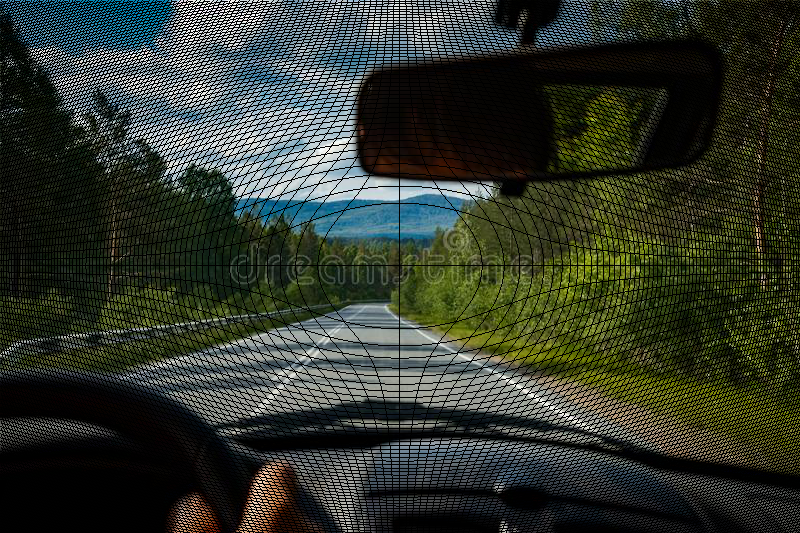

In [12]:
Image.fromarray(cv2.cvtColor(distorted_image, cv2.COLOR_BGR2RGB))

In [13]:
import cv2
import numpy as np

def fisheye(image_path, k=0.6):
    # Load the image
    image = cv2.imread(image_path)
    
    # Get the image size
    height, width = image.shape[:2]
    
    # Calculate the center of the image
    center_x = width // 2
    center_y = height // 2
    
    # Generate the fisheye mapping
    map_x, map_y = np.meshgrid(np.arange(width), np.arange(height))
    map_x = (map_x - center_x) / width
    map_y = (map_y - center_y) / height
    r = np.sqrt(map_x**2 + map_y**2)
    theta = np.arctan2(map_y, map_x)
    r_distorted = r * (1 + k*r**2)
    map_x_distorted = r_distorted * np.cos(theta) * width + center_x
    map_y_distorted = r_distorted * np.sin(theta) * height + center_y
    
    # Remap the image using the fisheye mapping
    distorted_image = cv2.remap(image, map_x_distorted.astype(np.float32), map_y_distorted.astype(np.float32),
                                interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
    
    return distorted_image

# Example usage
image_path = "./test.jpeg"
distorted_image = fisheye(image_path, k=0.6)



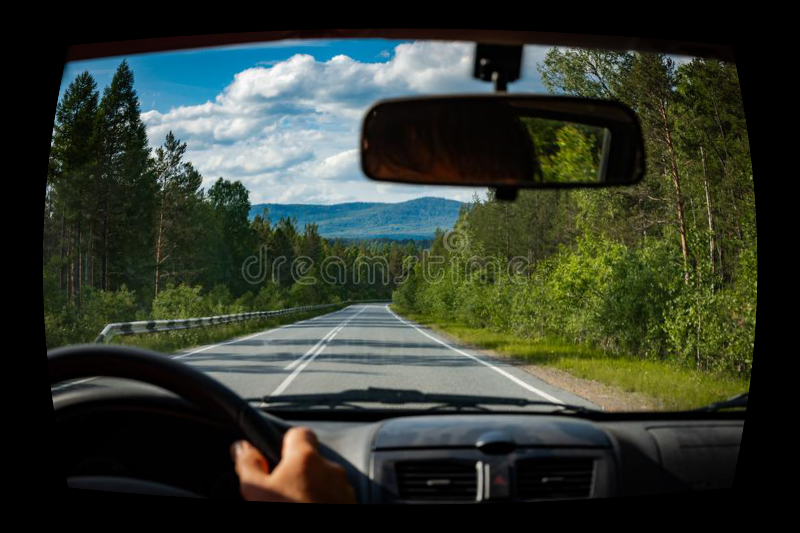

In [14]:
Image.fromarray(cv2.cvtColor(distorted_image, cv2.COLOR_BGR2RGB))